## Learning Exercise II-B
Let's solve a 4-Lights Out problem with qRAM.  

When the initial board state lightsout4=\[\[Board 0\],\[Board 1\],\[Board 2\],\[Board 3\]\] is described by the following data, 
determine the _binary_ number of the solvable boards in $3$ switch operations.  (ex. Board 0 → 00, 1 → 01, 2 → 10, 3 → 11)

Answer by creating a quantum circuit to solve the puzzle shown in the figure below. In the quantum circuit to be submitted, measure only the `solution` (2bit) that solves the puzzle.

To submit your solution, create a function which takes "lightsout4" as an input and returns `QuantumCircuit`.  You can choose a function name you like. Make sure it works even if you input another dataset to "lightsout4".

 **In addition, please implement the quantum circuit within 28 qubits.**

Please note that you can get the answer with the same endian as the one used in the description. You can also use the following function.
```python
qc = qc.reverse_bits()
```

In [1]:
from IPython.display import Image, display
Image('4lightsout_pr.png')

In [2]:
#lightsout4_ex is original "lightsout4". Correct answer is 01.
lightsout4_ex=[[1, 1, 1, 0, 0, 0, 1, 0, 0],[1, 0, 1, 0, 0, 0, 1, 1, 0],[1, 0, 1, 1, 1, 1, 0, 0, 1],[1, 0, 0, 0, 0, 0, 1, 0, 0]]

#6,7,3,4, Ans:10
validation_10=[[1,1,1, 0,1,1, 1,1,0],[0,1,0, 1,0,0, 0,1,1],[0,1,1, 1,1,0, 1,0,0],[1,1,0, 1,1,0, 0,1,0]]
#4,5,7,2, Ans:11
validation_11=[[1,1,1, 0,1,1, 0,0,1],[1,1,0, 0,0,1, 1,1,1],[1,1,0, 1,1,1, 0,1,1],[1,1,0, 0,0,1, 1,1,0]]
#3,4,5,6, Ans:00
validation_00=[[1,1,0, 1,0,0, 1,0,1],[1,1,0, 1,1,0, 0,1,0],[0,0,0, 1,1,0, 1,1,1],[1,1,1, 1,1,0, 0,1,1]]

lightsout4=lightsout4_ex

*This solution is closely related to ex_2a_solution, so please read that first.*  
We published following hint during the Week2.  
We will design the quantum circuit based on this hint.  
As $U_{2A}$, we will adopt "Another solution" in 2a solution.

In [3]:
Image('hint_2b_page1.png')

First prepare the components of this circuit.  
Toffoli gates in QRAM is commutative, so *qram_exercise_dagger* is identical to *qram_exercise*.

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
address=QuantumRegister(2)
tile = QuantumRegister(9)
flip = QuantumRegister(9)
oracle = QuantumRegister(1)
auxiliary = QuantumRegister(6)
c = ClassicalRegister(2)
# 27 qubit
qc = QuantumCircuit(address, tile, flip, oracle, auxiliary, c)

In [5]:
#initialize
def initialize():
    qc.h(address[0:2])
    qc.h(flip[:3])
    qc.x(oracle[0])
    qc.h(oracle[0])
    
#qram
def qram_exercise(prob_array, qc, qr, qa):
    k=0
    for board in prob_array:
        if k//2==0:
            qc.x(qa[0])
        if k%2==0:
            qc.x(qa[1])            
        j=0
        for i in board:
            if i==1:
                qc.ccx(qa[0],qa[1],qr[j])
                j+=1
            else:
                j+=1
        if k//2==0:
            qc.x(qa[0])
        if k%2==0:
            qc.x(qa[1])
        k+=1

This QRAM uses a number of Toffoli (CCX) gates, but there is room for improvement.

For example,  
If the certain bit on all boards are "1", four CCX gates are combined into one X gate.  
If the certain bit on two boards with hamming distance of 1 are "1", two CCX gates are combined into one CX gate.

Implementation of QRAM with fewer gates will be an important issue in the future.  
Addressing using gray code (for hamming distance optimization) and image rotation or flip may be useful in pre-processing.


In [6]:
#U2A (base: 2a-another solution)
def flip_1(qc,flip,tile):
    # push 0
    qc.cx(flip[0], tile[0])
    qc.cx(flip[0], tile[1])
    qc.cx(flip[0], tile[3])
    # push 1
    qc.cx(flip[1], tile[0])
    qc.cx(flip[1], tile[1])
    qc.cx(flip[1], tile[2])
    qc.cx(flip[1], tile[4])
    # push 2
    qc.cx(flip[2], tile[1])
    qc.cx(flip[2], tile[2])
    qc.cx(flip[2], tile[5]) 
    
def inv_1(qc,flip,tile):
    # copy 0,1,2
    qc.cx(tile[0], flip[3])
    qc.cx(tile[1], flip[4])
    qc.cx(tile[2], flip[5])
    
def flip_2(qc,flip,tile):
    # apply flip[3,4,5]
    qc.cx(flip[3], tile[0])
    qc.cx(flip[3], tile[3])
    qc.cx(flip[3], tile[4])
    qc.cx(flip[3], tile[6])
    qc.cx(flip[4], tile[1])
    qc.cx(flip[4], tile[3])
    qc.cx(flip[4], tile[4])
    qc.cx(flip[4], tile[5])
    qc.cx(flip[4], tile[7])
    qc.cx(flip[5], tile[2])
    qc.cx(flip[5], tile[4])
    qc.cx(flip[5], tile[5])
    qc.cx(flip[5], tile[8])
    
def inv_2(qc,flip,tile1):
    # copy 3,4,5
    qc.cx(tile[3], flip[6])
    qc.cx(tile[4], flip[7])
    qc.cx(tile[5], flip[8])
    
def flip_3(qc,flip,tile):
    qc.cx(flip[6], tile[3])
    qc.cx(flip[6], tile[6])
    qc.cx(flip[6], tile[7])
    qc.cx(flip[7], tile[4])
    qc.cx(flip[7], tile[6])
    qc.cx(flip[7], tile[7])
    qc.cx(flip[7], tile[8])
    qc.cx(flip[8], tile[5])
    qc.cx(flip[8], tile[7])
    qc.cx(flip[8], tile[8])

def lights_out_oracle(qc,tile,oracle,auxiliary):
    qc.x(tile[6:9])
    qc.mct(tile[6:9], oracle[0], auxiliary)
    qc.x(tile[6:9])
    
def flipdiffusion(qc,flip):
    qc.h(flip[:3])
    qc.x(flip[:3])
    qc.h(flip[2])
    qc.ccx(flip[0],flip[1],flip[2])
    qc.h(flip[2])
    qc.x(flip[:3])
    qc.h(flip[:3])

In [7]:
# Counter components
def counter(qc, flip,auxiliary):
    for i in range(len(flip)):
        qc.mct([flip[i],auxiliary[0],auxiliary[1],auxiliary[2]],auxiliary[3],auxiliary[4:6])
        qc.mct([flip[i],auxiliary[0],auxiliary[1]],auxiliary[2],auxiliary[4])
        qc.ccx(flip[i],auxiliary[0],auxiliary[1])
        qc.cx(flip[i],auxiliary[0])
        
def revcounter(qc, flip,auxiliary):
    for i in range(len(flip)):
        qc.cx(flip[i],auxiliary[0])
        qc.ccx(flip[i],auxiliary[0],auxiliary[1])
        qc.mct([flip[i],auxiliary[0],auxiliary[1]],auxiliary[2],auxiliary[4])
        qc.mct([flip[i],auxiliary[0],auxiliary[1],auxiliary[2]],auxiliary[3],auxiliary[4:6])

def addressdiffusion(qc,address):
    qc.h(address[:2])
    qc.x(address[:2])
    qc.cz(address[0],address[1])
    qc.x(address[:2])
    qc.h(address[:2])

Since we adopted the "double Grover search", we have two types of diffusion operators for flip and address qubits.

In [8]:
initialize()
qram_exercise(lightsout4, qc, tile, address)
#U_2A
for i in range(2):
    flip_1(qc,flip,tile)
    inv_1(qc,flip,tile)
    flip_2(qc,flip,tile)
    inv_2(qc,flip,tile)
    flip_3(qc,flip,tile)

    lights_out_oracle(qc,tile,oracle,auxiliary)

    flip_3(qc,flip,tile)
    inv_2(qc,flip,tile)
    flip_2(qc,flip,tile)
    inv_1(qc,flip,tile)
    flip_1(qc,flip,tile)

    flipdiffusion(qc,flip)

First, we solve QRAM's four boards simultaneously with $U_{2A}$.  
When adopting Grover to $U_{2A}$, an appropriate number of iterations of Oracle and Diffusion is necessary.

In [9]:
#Converting "3 qubits flip-information" to 9 qubits.
flip_1(qc,flip,tile)
inv_1(qc,flip,tile)
flip_2(qc,flip,tile)
inv_2(qc,flip,tile)

#count number of "1"s
counter(qc, flip,auxiliary)

#Inverting the phase of a legal solution (up to 3 pushes).
qc.x(auxiliary[2])
qc.x(auxiliary[3])
qc.ccx(auxiliary[2],auxiliary[3],oracle[0])
qc.x(auxiliary[2])
qc.x(auxiliary[3])

#Uncomputing: The phase information returns to the 3 qubits flip-information.
revcounter(qc, flip,auxiliary)
inv_2(qc,flip,tile)
flip_2(qc,flip,tile)
inv_1(qc,flip,tile)
flip_1(qc,flip,tile)

This counter part inverts the phase of the “solution” on flip qubits
if there are 3 or less “1”s in the solution.  
*Note: The counter will process the solution of the four boards simultaneously in a superposition state.*

In naive implementation, checking the push times individually we would need four C4X gates.  
We can perform this operation with a single CCX gate by gate composition as shown in the figure below.  
Here we can ignore a control qubit and compose two gates because the remaining part will be executed regardless of the control qubit states in the dashed line.

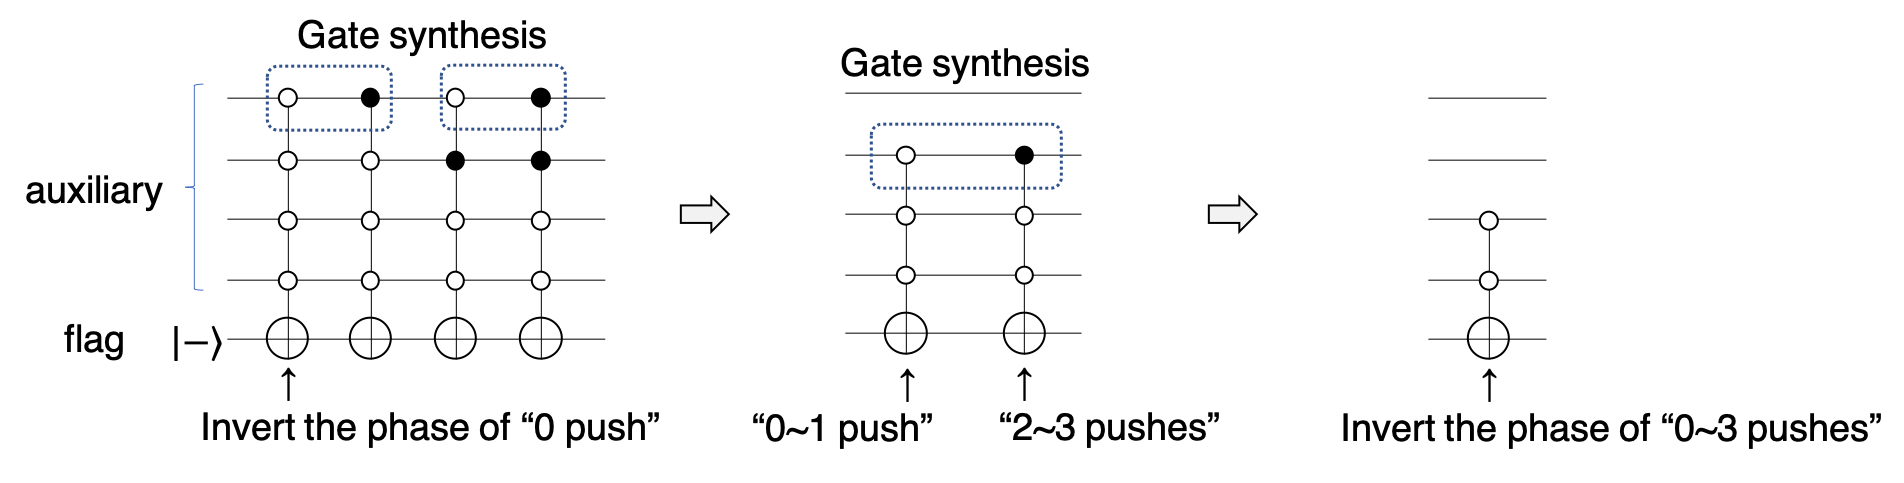

In [10]:
Image('hint2b-c2.png')

In [11]:
#Uncomputing: The phase information returns to the 9 qubits board-information.
for i in range(2):
    flipdiffusion(qc,flip)
    flip_1(qc,flip,tile)
    inv_1(qc,flip,tile)
    flip_2(qc,flip,tile)
    inv_2(qc,flip,tile)
    flip_3(qc,flip,tile)

    lights_out_oracle(qc,tile,oracle,auxiliary)

    flip_3(qc,flip,tile)
    inv_2(qc,flip,tile)
    flip_2(qc,flip,tile)
    inv_1(qc,flip,tile)
    flip_1(qc,flip,tile)

#Uncomputing: The phase information returns to the QRAM address qubits.
qram_exercise(lightsout4, qc, tile, address)

#Diffusion
addressdiffusion(qc,address)
# Measurement
qc.measure(address,c[0:2])

# Reverse the output string.
qc = qc.reverse_bits()
#qc.draw(output='mpl')

Uncomputing of $U_{2A}$ requires $U_{2A}^{\dagger}$ in the following figure  
where $U_{2A}^{\dagger}$ satisfies $U_{2A}U_{2A}^{\dagger}=\hat{I}$ (identity operator).

In this implementation, we simply configure $U_{2A}$ by gate operations in reverse order.  
If we adopt a non-Hermit-conjugate matrix in the $U_{2A}$, we need to be careful, for example, to change the rotation angle from $\theta$ to $-\theta$.

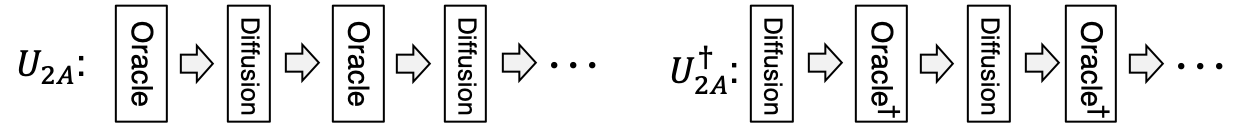

In [12]:
Image('hint2b-rev.png')

In [13]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Unroll the circuit
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)

# obtain gates
gates=new_circuit.count_ops()
print(gates)

OrderedDict([('u3', 1964), ('cx', 1951), ('measure', 2)])


In [ ]:
#%%time
from qiskit import IBMQ, Aer, execute
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=backend, shots=8000, seed_simulator=123456, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()

In [15]:
score_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)
final_score = score_sorted[0:40]
final_score

[('01', 7758), ('10', 99), ('11', 73), ('00', 70)]